In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import  MinMaxScaler

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Dense

In [6]:
data=pd.read_csv("data2.csv")

In [7]:
data.head()

,input,output
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [8]:
x=data[['input']].values
x


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [9]:
y=data[['output']].values
y

array([[ 10],
       [ 20],
       [ 30],
       [ 40],
       [ 50],
       [ 60],
       [ 70],
       [ 80],
       [ 90],
       [100]])

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)

In [11]:
Scaler=MinMaxScaler() #range 0-1

In [12]:
Scaler.fit(x_train)

MinMaxScaler()

In [13]:
Scaler.fit(x_test)

MinMaxScaler()

In [14]:
x_train1=Scaler.transform(x_train)
x_train1

array([[ 1.2],
       [-0.4],
       [ 0.6],
       [-0.2],
       [-0.6],
       [ 0.8],
       [ 0.2]])

In [15]:
x_train

array([[10],
       [ 2],
       [ 7],
       [ 3],
       [ 1],
       [ 8],
       [ 5]])

In [16]:
AI_BRAIN=Sequential([
    Dense(6,activation='relu'),
    Dense(7,activation='relu'),
    Dense(1,activation='relu')
])

In [17]:
AI_BRAIN.compile(optimizer='rmsprop', loss='mse')

In [18]:
AI_BRAIN.fit(x_train1,y_train,epochs=4000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 6ms/step - loss: 4.7809
Epoch 1502/4000
1/1 [==============================] - 0s 7ms/step - loss: 4.6393
Epoch 1503/4000
1/1 [==============================] - 0s 7ms/step - loss: 4.5019
Epoch 1504/4000
1/1 [==============================] - 0s 7ms/step - loss: 4.3688
Epoch 1505/4000
1/1 [==============================] - 0s 6ms/step - loss: 4.2397
Epoch 1506/4000
1/1 [==============================] - 0s 7ms/step - loss: 4.1147
Epoch 1507/4000
1/1 [==============================] - 0s 7ms/step - loss: 3.9936
Epoch 1508/4000
1/1 [==============================] - 0s 8ms/step - loss: 3.8763
Epoch 1509/4000
1/1 [==============================] - 0s 8ms/step - loss: 3.7628
Epoch 1510/4000
1/1 [==============================] - 0s 7ms/step - loss: 3.6529
Epoch 1511/4000
1/1 [==============================] - 0s 7ms/step - loss: 3.5466
Epoch 1512/4000
1/1 [==============================] - 0s 7ms/s

In [19]:
loss_df=pd.DataFrame(AI_BRAIN.history.history)


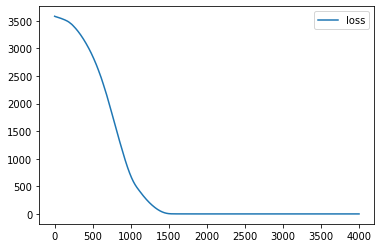

In [20]:
loss_df.plot()

In [21]:
#FINDING THE LOSS FUNCTION FOR TEST DATA

In [22]:
x_test1=Scaler.transform(x_test)
x_test1

array([[1. ],
       [0. ],
       [0.4]])

In [23]:
AI_BRAIN.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 118ms/step - loss: 0.0070


0.007035519927740097

In [25]:
x_n1=[[40]]

In [26]:
x_n1_1=Scaler.transform(x_n1)

In [27]:
AI_BRAIN.predict(x_n1_1)


array([[401.1806]], dtype=float32)